In this notebook, we will be looking at using support vector machines for large-margin classification. We'll code from scratch, using only the numpy and matplotlib libraries.
This notebook will also be using a library called jdc, but this is only to include the "add_to class" magic. We'll be using a class to create our support vector machine, which could lead to us having a huge chunk of code in a single cell. The aforementioned magic allows you to avoid this by adding code from different cells to a particular class.

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jdc
%matplotlib inline

# Class definition
We'll create a class called Support_Vector_Machine, and we'll define our positive classifications to be red and our negative ones to be blue. We'll also initialize a pyplot figure and subplot.

In [2]:
class Support_Vector_Machine:
    def __init__(self):
        self.colors = {1: 'r', -1: 'b'}
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(1, 1, 1)

# Fitting (or Training)
This is the function that trains the model to the data given. Here, we'll calculate $|w|$ and create a dictionary in which the keys are values for $|w|$ and the values are the corresponding $[w, b]$. After that's done, we'll pick the minimum value of $|w|$. Also note that we're only considering integer values of $w$; this is done to cut on time, and since it works pretty well anyway.

In [3]:
%%add_to Support_Vector_Machine
def fit(self, data):
    self.data = data
    mag_w = {} # Dictionary that'll store |w| and corresponding [w, b].
    '''For any value of w = [w1, w2], |w| will be the same no matter whether w1 and w2 are positive or
    negative as long as w1 and w2 have fixed magnitudes. So, the following list contains transformations
    that can be done to check for all said combinations.'''
    transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]
    
    '''Now, let's find the maximum and minimum values of x. These will help define starting points and the
    step-sizes.'''
    self.max_feature_value = float('-inf')
    self.min_feature_value = float('+inf')
    for yi in data_dict:
        if np.amax(data_dict[yi]) > self.max_feature_value:
            self.max_feature_value = np.amax(data_dict[yi])
        if np.amin(data_dict[yi]) < self.min_feature_value:
            self.min_feature_value = np.amin(data_dict[yi])
    
    step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001]
    
    b_range_multiple = 2
    '''Taking steps for b is more computationally expensive; it's also not required to be as fine-grained
    as in the case of w. Thus, while taking the steps, we'll go by a multiple of the step-sizes given to
    w, and that multiple is being defined below.'''
    b_multiple = 5
    
    latest_optimum = self.max_feature_value * 10
    for step in step_sizes:
        w = np.array([latest_optimum, latest_optimum])
        optimized = False # This is possible because we know it's convex.
        while not optimized:
            for b in np.arange(-1 * self.max_feature_value * b_range_multiple,
                               self.max_feature_value * b_range_multiple,
                               step * b_multiple):
                for transformation in transforms:
                    w_transform = w * transformation
                    found_option = True
                    '''This is the weakest part of SVM -- having to run the calculation on all the data. SMO
                    attempts to fix this, but can only go so far.'''
                    for yi in self.data:
                        for xi in self.data[yi]:
                            if not yi*(np.dot(w_transform,xi)+b) >= 1:
                                found_option = False
                                break
                    if found_option:
                        mag_w[np.linalg.norm(w_transform)] = [w_transform, b] # norm() is the same as | |.
            
            if w[0] < 0:
                optimized = True
            else:
                w -= step
        
        norms = sorted([n for n in mag_w])
        min_w_mag = mag_w[norms[0]]
        self.w = min_w_mag[0]
        self.b = min_w_mag[1]
        latest_optimum = min_w_mag[0][0] + step * 2

# Predicting
This method will predict the value of a new input. It will also add points to the plot using a different marker, so that we can see where the points are being graphed.

In [4]:
%%add_to Support_Vector_Machine
def predict(self,features):
    # sign(x . w + b)
    classification = np.sign(np.dot(np.array(features), self.w) + self.b)
    if classification != 0:
        self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        # This just adds the test-set points to the same plot as stars.
    return classification

# Plotting
Finally, this method is simply used to plot the hyperplane and the decision boundary. Note that this is only for the human; the model will work fine without this function.

In [5]:
%%add_to Support_Vector_Machine
def visualize(self):
    [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    def hyperplane(x, w, b, v):
        '''Values of v:
        psv -> 1
        nsv -> -1
        on db -> 0'''
        return (v - w[0] * x - b) / w[1]
    
    # This is just to limit the graph to values outside the minimum and maximum.
    hyp_x_min = self.min_feature_value * 0.9
    hyp_x_max = self.max_feature_value * 1.1
    
    psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
    psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
    self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
    
    nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
    nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
    self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
    
    db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
    db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
    self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
    
    plt.show()

# Testing
We're done! Now, we'll just give some inputs and see whether or not it works.

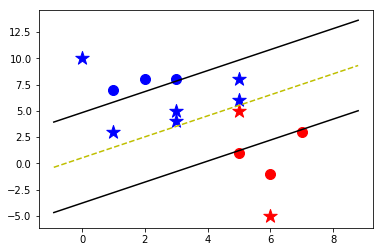

In [6]:
data_dict = {-1: np.array([[1, 7],
                          [2, 8],
                          [3, 8]]),
             1: np.array([[5, 1],
                         [6, -1],
                         [7, 3]])}

m = Support_Vector_Machine()
m.fit(data_dict)

predict_this = [[0, 10],
              [1, 3],
              [3, 4],
              [3, 5],
              [5, 5],
              [5, 6],
              [6, -5],
              [5, 8]]

for p in predict_this:
    m.predict(p)

m.visualize()

This code was written with the help of the sentdex YouTube channel; check him out: https://www.youtube.com/user/sentdex

An amazing SVM lecture: https://youtu.be/_PwhiWxHK8o

The accompanying mega-recitation: https://youtu.be/6nDqY8MPLDM